# Universal Mechanical 
### Alastair McLean

The Python code in this Notebook can be used to investigate oscillations in undamped, damped or forced systems. It uses the universal notation. You simply have to choose the appropriate values for your system below and the code will calculate the response of the system, the velocity of the system and the phase diagram. 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from scipy.integrate import odeint
from scipy import signal as sig
%matplotlib inline

### Functions

In [2]:
def w_n(k, m):
    return np.sqrt(k/m)

def f_n(k, m):
    return np.sqrt(k/m)/(2*np.pi)

def T_n(k, m):
    return 2*np.pi/w_n(k, m)

def dampingratio(c, m, wn):
    return c/(2*m*wn)

def squaredrivingforce(t, fo, period):
    return fo*(sig.square(2.0*np.pi*t/period, duty=0.5))
    
def cosinedrivingforce(fo, w, t):
    return fo*np.cos(w*t)
   
def f(y, t, params):
    # unpack current values of y
    x, v = y    
    # unpack parameters
    zeta, wn, f_o, r = params     
    # list of derivatives
    if wave == 'square':
        derivs = [v, -2*zeta*wn*v - pow(wn, 2)*x + squaredrivingforce(t, f_o, squarewaveperiod)]
    if wave == 'cos':
        derivs = [v, -2*zeta*wn*v - pow(wn, 2)*x + cosinedrivingforce(f_o, r*wn, t)]
    return derivs

In [157]:
def responseandphasediagram(time, sol):
    plt.figure(figsize=(12, 6))
    G = gridspec.GridSpec(2, 2)
    axes_1 = plt.subplot(G[0, :-1])
    xmax = 1.1*np.amax(sol[:,0])
    xmin = 1.1*np.amin(sol[:,0])
    plt.plot(time, sol[:,0],'r-')
    plt.xlabel('t (s)', fontsize=16)
    plt.ylabel('x (m)', fontsize=16)
    plt.ylim(xmin, xmax)
    axes_2 = plt.subplot(G[-1, 0])
    vmax = 1.1*np.amax(sol[:,1])
    vmin = 1.1*np.amin(sol[:,1])
    plt.plot(time, cosinedrivingforce(f_o, r*wn, t),'y-')
    plt.xlabel('t (s)', fontsize=16)
    plt.ylabel('v (m/s)', fontsize=16)
#     plt.ylim(vmin, vmax)
    axes_3 = plt.subplot(G[:, -1])
    plt.plot(sol[:,0], sol[:,1], 'g-')
    plt.xlabel('x (m)', fontsize=16)
    plt.ylabel('v (m/s)', fontsize=16)
    plt.xlim(xmin, xmax)
    plt.ylim(vmin, vmax)
    plt.tight_layout()
    #plt.savefig('04a-reader-damped-0-01-drivenatresonance.pdf')
    plt.show()

## Investigation 1 FREE RESPONSE
### Square Wave Driving Force

The system is going to be driven by a square wave force with an amplitude of $\pm$ 40 N. Because our system has a spring constant of 40 N/cm the equilibrium displacement with be $\pm$ 1.0 cm when the static force is applied. Make the squarewaveperiod 5.0 s and the timeinverval = 10 s, so that we can observe two complete periods. The damping ratio will initially be set to be 1.0, to ensure critical damping and movement to the equilibrium value without overshoot. The initial conditions are $x_\circ$ = $v_\circ$ = 0. 

|WAVE|Damping Ratio ($\zeta$)| Squarewave Period | Force (N)   |Time Interval|
|:-:|:-:|:-:|:-:|:-:|
|square| 1.0   |5.0| 40.0   |10.0|

- Can you explain the phase diagram?
- What is the curve that links (0, 0) to (1, 0)?
- Why does the trajectory on the phase plot have 'vertexes' at (1, 0) and (-1, 0)?

Now reduce the damping ratio from 1.0 to 0.2 in steps of 0.2.

|WAVE|Damping Ratio ($\zeta$)| Squarewave Period | Force (N)   |Time Interval|
|:-:|:-:|:-:|:-:|:-:|
|square| 0.2   |5.0| 40.0   |10.0|

- Can you explain the phase plot you now have?

## Investigation 2 RESONANCE
### Cosine Driving Force

The system is going to be driven by a cosine force with an amplitude of $\pm$ 40 N. Because our system has a spring constant of 40 N/cm the equilibrium displacement for a static force (no time dependence) will be $\pm$ 1.0 cm. Instead of using the squarewaveperiod, we use the normalized frequency r and we set the time period to be 10 natural periods. Once again the initial conditions are $x_\circ$ = $v_\circ$ = 0. We are going to incrementally move the driving frequency closer to the natural frequency of the system. So comment the square wave parameters and uncomment the cos wave parameters. As you change the damping ratio, look to see how the radius of the trajectory in the phase plot changes. 

|WAVE|Damping Ratio ($\zeta$)| r | Force (N)   |Time Interval|
|:-:|:-:|:-:|:-:|:-:|
|cos| 1.0   |1.0| 40.0   |10 periods |
|cos| 0.8   |1.0| 40.0   |10 periods |
|cos| 0.6   |1.0| 40.0   |10 periods |
|cos| 0.4   |1.0| 40.0   |10 periods |
|cos| 0.2   |1.0| 40.0   |10 periods |
|cos| 0.1   |1.0| 40.0   |10 periods |
|cos| 0.01   |1.0| 40.0   |10 periods |
|cos| 0.01   |1.0| 40.0   |100 periods |
|cos| 0.001   |1.0| 40.0   |100 periods |
|cos| 0.001   |1.0| 40.0   |1000 periods |
|cos| 0.0001   |1.0| 40.0   |1000 periods |
|cos| 0.0001   |1.0| 40.0   |10000 periods |
|cos| 0.0001   |1.0| 40.0   |100000 periods |

- What can you conclude?

## Investigation 3 BEATS (initial conditions and driving frequency)
Using the cos driving force with an r value of 1.01 to start with. The idea is to investigate the beats between the response to the intial conditions that are at the natural frequency of the system and the response to the driving force which are at the value of r. Remember r is a frequency divided by the natural frequency of the system. 


|WAVE|r |Damping Ratio ($\zeta$)| Squarewave Period | Force (N)   |Time Interval|
|:-:|:-:|:-:|:-:|:-:|
|square|1.01| 0.001   |5.0| 40.0   |100.0 periods|
|square|1.02| 0.001   |5.0| 40.0   |100.0 periods|
|square|1.03| 0.001   |5.0| 40.0   |100.0 periods|
|square|1.04| 0.001   |5.0| 40.0   |100.0 periods|
|square|1.05| 0.001   |5.0| 40.0   |100.0 periods|
|square|1.06| 0.001   |5.0| 40.0   |100.0 periods|

- Can you explain the changes you see?

In [142]:
k = 40.0
mass = 0.1
wn = w_n(k, mass)
dampingratio = 0.001
force = 40.0
f_o = force/mass

# square driving force
# wave = 'square'
# squarewaveperiod = 5.0
# timeinterval = 100.0

# cos driving force
# the line containing the value of r should not be uncommented, even if not used. 
# the other lines can be uncommented. 
wave = 'cos'
r = 1.06
timeinterval = 1000.0*T_n(k, mass)

### Initial values

In [138]:
x0 = 0.0  # displacement
v0 = 0.0  # velocity

### time array

In [139]:
t = np.arange(start = 0., stop = timeinterval, step = timeinterval/100000.)

### Solve ODE solver

In [140]:
def solveODE():
    params = [dampingratio, wn, f_o, r ]
    y0 = [x0, v0]
    solution = odeint(f, y0, t, args=(params,))
    return solution

### Reponse and Phase Diagram

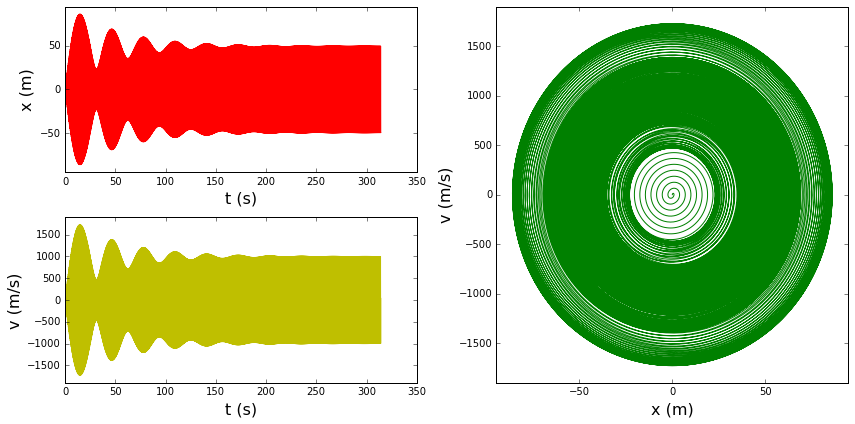

In [145]:
r=1.01
solution = solveODE()
responseandphasediagram(t, solution)

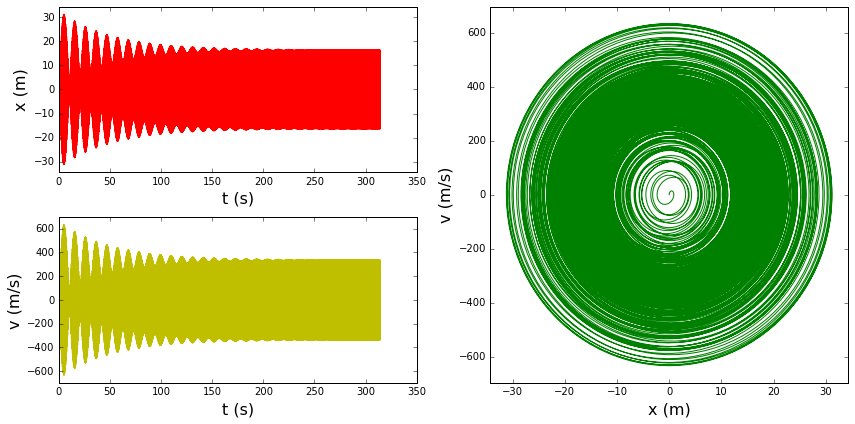

In [146]:
r=1.03
solution = solveODE()
responseandphasediagram(t, solution)

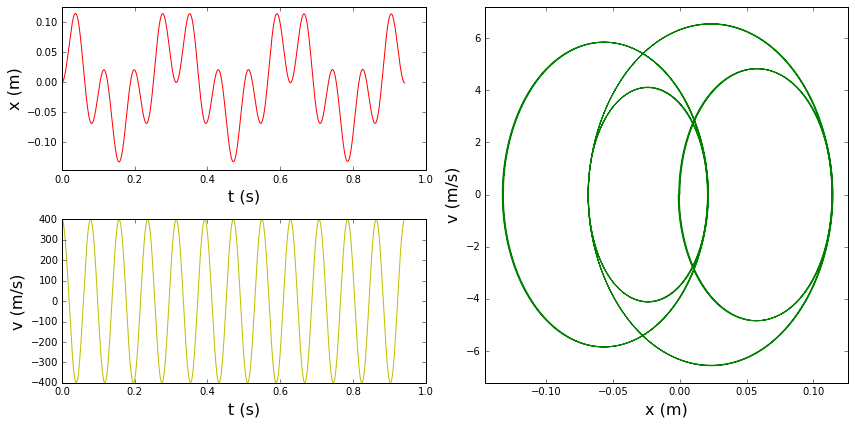

In [158]:
r=4
timeinterval = 3.0*T_n(k, mass)
t = np.arange(start = 0., stop = timeinterval, step = timeinterval/100000.)
solution = solveODE()
responseandphasediagram(t, solution)